In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import utils as mjo 
import pickle
%load_ext autoreload 
%autoreload 2

In [2]:
mjo_ind = 'ROMI'

In [3]:
# bcclist, rmse_list = mjo.get_1var_skill_parallel('RMM',[0,5,10,15],batch_size=32,kernel_size=3,drop_prob=0.1, optimizer_type='Adam',learning_rate=0.001,num_epochs=100,m=10,mflg='resi',wnx=9,wnxflg='resi')
if mjo_ind == 'RMM':
    lead_list = [0,5,10,15]
elif mjo_ind == 'ROMI':
    lead_list = [0,5,10,15,20,25]
batch_sizes = [32,64,128]
kernel_sizes = [3,5,7]
drop_probs = [0.1,0.3,0.5]
optimizer_types = ['Adam','SGD']
learning_rates = [0.0005,0.001,0.005]
num_epochs = [100,]

# lead, batch_size, kernel_size, drop_prob, optimizer_type, learning_rate, num_epochs
bcclist, rmse_list = mjo.get_1var_skill_parallel(mjo_ind,lead_list=lead_list,batch_sizes=batch_sizes,kernel_sizes=kernel_sizes,
                                                 drop_probs=drop_probs, optimizer_types=optimizer_types,learning_rates=learning_rates,
                                                 num_epochss=num_epochs,m=1,mflg='off',wnx=1,wnxflg='off')



Start parallel computing...
batch_sizes: [32, 64, 128]


In [4]:
bcc_e1 = np.empty((len(lead_list),len(batch_sizes)*len(kernel_sizes)*len(drop_probs)*len(optimizer_types)*len(learning_rates)))
rmse_e1 = np.empty((len(lead_list),len(batch_sizes)*len(kernel_sizes)*len(drop_probs)*len(optimizer_types)*len(learning_rates)))
ii = 0

for i in range(len(batch_sizes)):
    for j in range(len(kernel_sizes)):
        for k in range(len(drop_probs)):
            for l in range(len(optimizer_types)):
                for m in range(len(learning_rates)):
                    for kk, lead in enumerate(lead_list):
                        bcc_e1[kk,ii] = bcclist[(lead, batch_sizes[i], kernel_sizes[j], drop_probs[k], optimizer_types[l], learning_rates[m], 100)].values
                        rmse_e1[kk,ii] = rmse_list[(lead, batch_sizes[i], kernel_sizes[j], drop_probs[k], optimizer_types[l], learning_rates[m], 100)].values

                    ii += 1

In [5]:
batch_sizes = [32,64,128]
kernel_sizes = [3,5,7]
drop_probs = [0.1,0.3,0.5]
optimizer_types = ['Adam','SGD']
learning_rates = [0.0005,0.001,0.005]
num_epochs = [100,]

# lead, batch_size, kernel_size, drop_prob, optimizer_type, learning_rate, num_epochs
bcclist1, rmse_list1 = mjo.get_1var_skill_parallel(mjo_ind,lead_list=lead_list,batch_sizes=batch_sizes,kernel_sizes=kernel_sizes,
                                                 drop_probs=drop_probs, optimizer_types=optimizer_types,learning_rates=learning_rates,
                                                 num_epochss=num_epochs,m=10,mflg='resi',wnx=9,wnxflg='resi')



Start parallel computing...
batch_sizes: [32, 64, 128]


In [6]:
bcc_e4 = np.empty((len(lead_list),len(batch_sizes)*len(kernel_sizes)*len(drop_probs)*len(optimizer_types)*len(learning_rates)))
rmse_e4 = np.empty((len(lead_list),len(batch_sizes)*len(kernel_sizes)*len(drop_probs)*len(optimizer_types)*len(learning_rates)))

ii = 0

for i in range(len(batch_sizes)):
    for j in range(len(kernel_sizes)):
        for k in range(len(drop_probs)):
            for l in range(len(optimizer_types)):
                for m in range(len(learning_rates)):
                    for kk, lead in enumerate(lead_list):
                        bcc_e4[kk,ii] = bcclist1[(lead, batch_sizes[i], kernel_sizes[j], drop_probs[k], optimizer_types[l], learning_rates[m], 100)].values
                        rmse_e4[kk,ii] = rmse_list1[(lead, batch_sizes[i], kernel_sizes[j], drop_probs[k], optimizer_types[l], learning_rates[m], 100)].values

                    ii += 1

In [7]:
# reference 
with open('/global/homes/l/linyaoly/ERA5/script/Unet4MJO/bcc_all.pkl', 'rb') as f:
    bcc_arrays = pickle.load(f)
with open('/global/homes/l/linyaoly/ERA5/script/Unet4MJO/rmse_all.pkl', 'rb') as f:
    rmse_arrays = pickle.load(f)

In [8]:
if mjo_ind == 'RMM':
    bcc_e1_ref = bcc_arrays['bcc_rmm_1var'].mean(axis=0)
    bcc_e4_ref = bcc_arrays['bcc_rmm_1var_10resi9resi'].mean(axis=0)
    rmse_e1_ref = rmse_arrays['rmse_rmm_1var'].mean(axis=0)
    rmse_e4_ref = rmse_arrays['rmse_rmm_1var_10resi9resi'].mean(axis=0)
elif mjo_ind == 'ROMI':
    bcc_e1_ref = bcc_arrays['bcc_romi_1var'].mean(axis=0)
    bcc_e4_ref = bcc_arrays['bcc_romi_1var_10resi9resi'].mean(axis=0)
    rmse_e1_ref = rmse_arrays['rmse_romi_1var'].mean(axis=0)
    rmse_e4_ref = rmse_arrays['rmse_romi_1var_10resi9resi'].mean(axis=0)    

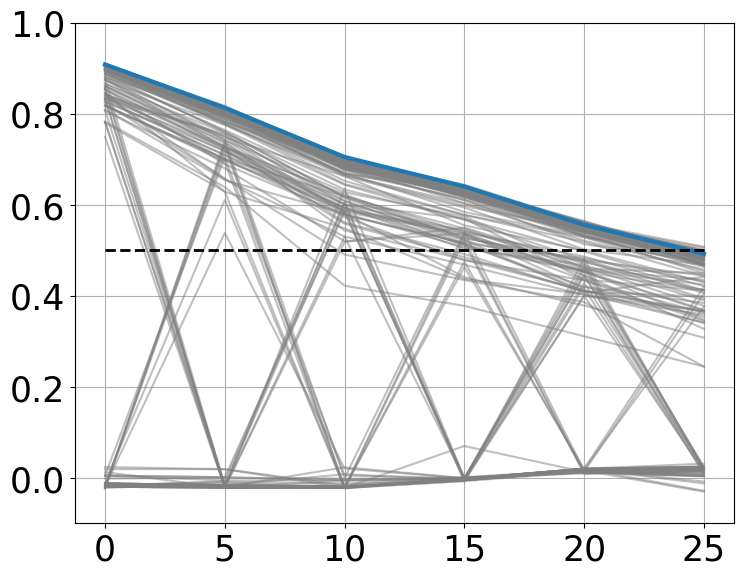

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8.5,6.5))
plt.rcParams.update({'font.size': 25})
ax.plot(lead_list, bcc_e1, color='grey', alpha=0.5)
ax.plot(lead_list, bcc_e1_ref[:len(lead_list)], color='tab:blue', label='E1', linewidth=3)
ax.plot([0, lead_list[-1]], [0.5, 0.5], color='black', linestyle='--', linewidth=2)
ax.set_ylim([-0.1,1])
ax.grid()


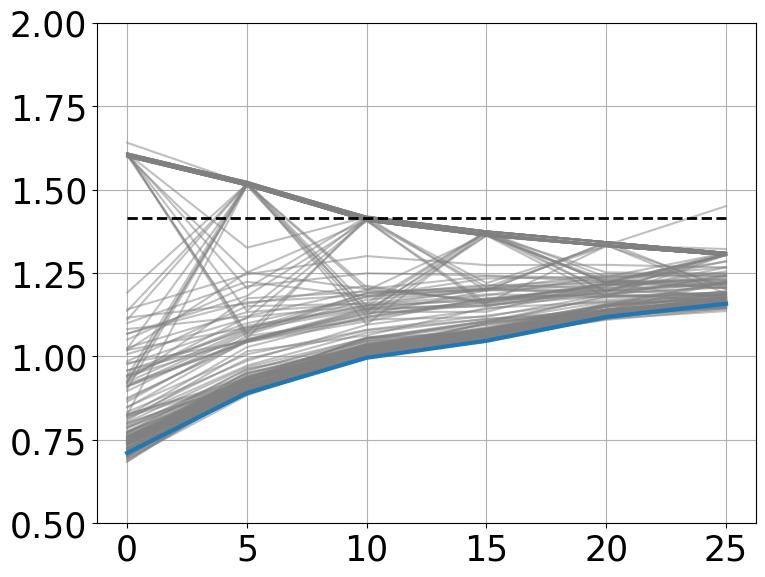

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8.5,6.5))
plt.rcParams.update({'font.size': 25})
ax.plot(lead_list, rmse_e1, color='grey', alpha=0.5)
ax.plot(lead_list, rmse_e1_ref[:len(lead_list)], color='tab:blue', label='E1', linewidth=3)
ax.plot([0, lead_list[-1]], [np.sqrt(2), np.sqrt(2)], color='black', linestyle='--', linewidth=2)
ax.set_ylim([0.5,2.0])
ax.grid()


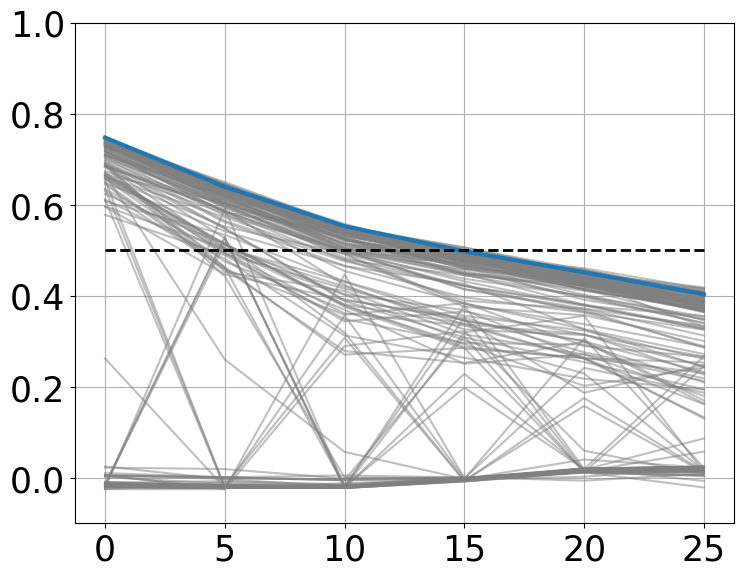

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8.5,6.5))
plt.rcParams.update({'font.size': 25})
ax.plot(lead_list, bcc_e4, color='grey', alpha=0.5)
ax.plot(lead_list, bcc_e4_ref[:len(lead_list)], color='tab:blue', label='E1', linewidth=3)
ax.plot([0, lead_list[-1]], [0.5, 0.5], color='black', linestyle='--', linewidth=2)
ax.set_ylim([-0.1,1])
ax.grid()


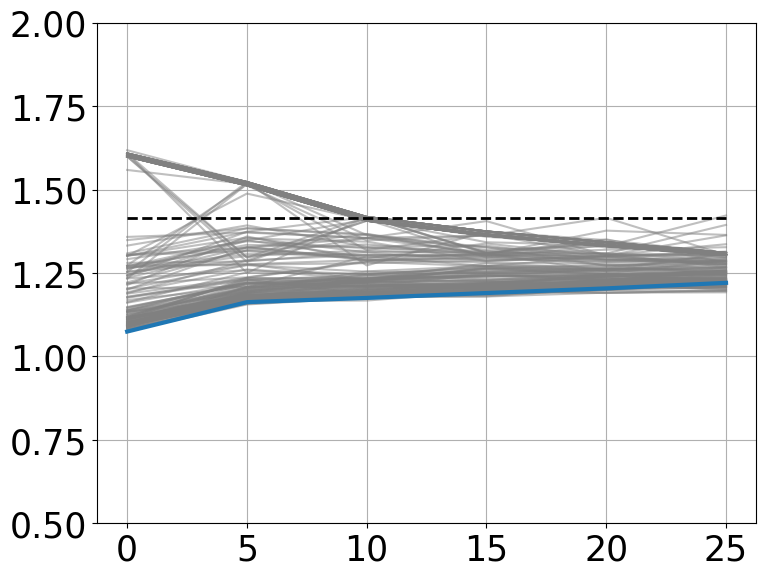

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8.5,6.5))
plt.rcParams.update({'font.size': 25})
ax.plot(lead_list, rmse_e4, color='grey', alpha=0.5)
ax.plot(lead_list, rmse_e4_ref[:len(lead_list)], color='tab:blue', label='E1', linewidth=3)
ax.plot([0, lead_list[-1]], [np.sqrt(2), np.sqrt(2)], color='black', linestyle='--', linewidth=2)
ax.set_ylim([0.5,2.0])
ax.grid()
